#1

### Set up data and create a object of class ProjectCollection

In [1]:
import kickass as ks
import matplotlib.pyplot as plt

import json
fd = open("../data/project_successful_final_tech_sample.json", "r")

project_json = json.load(fd)

ks_projects = ks.ProjectCollection(project_json, "../data/stopwords.txt")

### Visualize the singular values and variances to judge a suitable cut off

In [2]:
doc_id, D, s, T = ks_projects.svd(1)

In [3]:
#variance explained 
var = ks.np.cumsum(s ** 2) / sum(s ** 2)

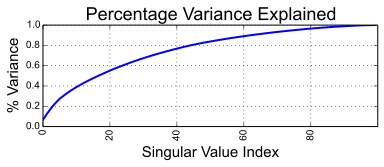

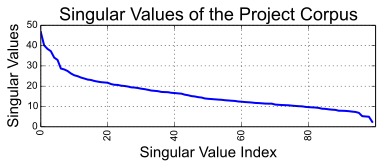

In [17]:
plt.subplot(211)
plt.plot(var, linewidth=2.0)
plt.ylabel('% Variance', fontsize = 15)
plt.xlabel('Singular Value Index', fontsize = 15)
plt.title('Percentage Variance Explained', fontsize = 18)
x = range(0, len(var), 20)
plt.xticks(x, rotation='vertical')
plt.grid(True)
plt.show()

plt.subplot(212)
plt.plot(s, linewidth=2.0)
plt.ylabel('Singular Values', fontsize = 15)
plt.xlabel('Singular Value Index', fontsize = 15)
plt.title('Singular Values of the Project Corpus', fontsize = 18)
x = range(0, len(var), 20)
plt.xticks(x, rotation='vertical')
plt.grid(True)
plt.show()

Lets pick cutoff atf 80% variance explained. We can choose the cutoff parameter of our function that returns a document term matrix to be either .8 or roughly 50 from the variance explained plot.

### Calculate a document term matrix based on LSA and without LSA

In [21]:
doc_id, doc_term_mat_LSA = ks_projects.latent_doc_term_mat(.8)
doc_id1, doc_term_mat = ks_projects.doc_term_mat()

In [27]:
#Confirm if the two doc_term matrices have the same document order
len(doc_id1) == sum([doc_id[i] == doc_id1[i] for i in range(len(doc_id1))])

True

### Calculate Cosine similarity of both Doc Term Matrices

In [35]:
ks.np.set_printoptions(precision=3)
print ks_projects.cosine_sim(doc_term_mat).round(3)

print ks_projects.cosine_sim(doc_term_mat_LSA).round(3)

print

[[ 1.     0.     0.    ...,  0.     0.041  0.036]
 [ 0.     1.     0.    ...,  0.022  0.019  0.003]
 [ 0.     0.     1.    ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.022  0.    ...,  1.     0.026  0.007]
 [ 0.041  0.019  0.    ...,  0.026  1.     0.07 ]
 [ 0.036  0.003  0.    ...,  0.007  0.07   1.   ]]
[[ 1.    -0.035 -0.    ..., -0.033  0.294  0.417]
 [-0.035  1.    -0.    ...,  0.022  0.052 -0.015]
 [-0.    -0.     1.    ...,  0.    -0.    -0.   ]
 ..., 
 [-0.033  0.022  0.    ...,  1.     0.099  0.023]
 [ 0.294  0.052 -0.    ...,  0.099  1.     0.363]
 [ 0.417 -0.015 -0.    ...,  0.023  0.363  1.   ]]
